In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
import matplotlib.patches as patches

In [2]:
def gaussian_laplacian_kernel(scale):
    radius = round(3 * scale)  # kernel radius based on sigma
    xx, yy = np.meshgrid(np.arange(-radius, radius + 1, 1), np.arange(-radius, radius + 1, 1))
    
    # Laplacian of Gaussian (LoG) formula
    kernel = ((xx ** 2 + yy ** 2) / (2 * scale ** 2) - 1) * np.exp(-(xx ** 2 + yy ** 2) / (2 * scale ** 2)) / (np.pi * scale ** 4)
    return kernel

In [3]:
def find_extrema(blob_img, threshold):
    positions = []
    rows, cols = blob_img.shape
    margin = 1
    for i in range(margin, rows - margin):
        for j in range(margin, cols - margin):
            block = blob_img[i-margin:i+margin+1, j-margin:j+margin+1]
            local_max = np.max(block)
            if local_max >= threshold:  # thresholding for local maxima
                x, y = np.unravel_index(np.argmax(block), block.shape)
                positions.append((i + x - margin, j + y - margin))
    return set(positions)

In [4]:
# Load and prepare the image
img_path = 'utils/the_berry_farms_sunflower_field.jpeg'
image = cv2.imread(img_path, cv2.IMREAD_COLOR)
grayscale_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) / 255.0  # normalize grayscale

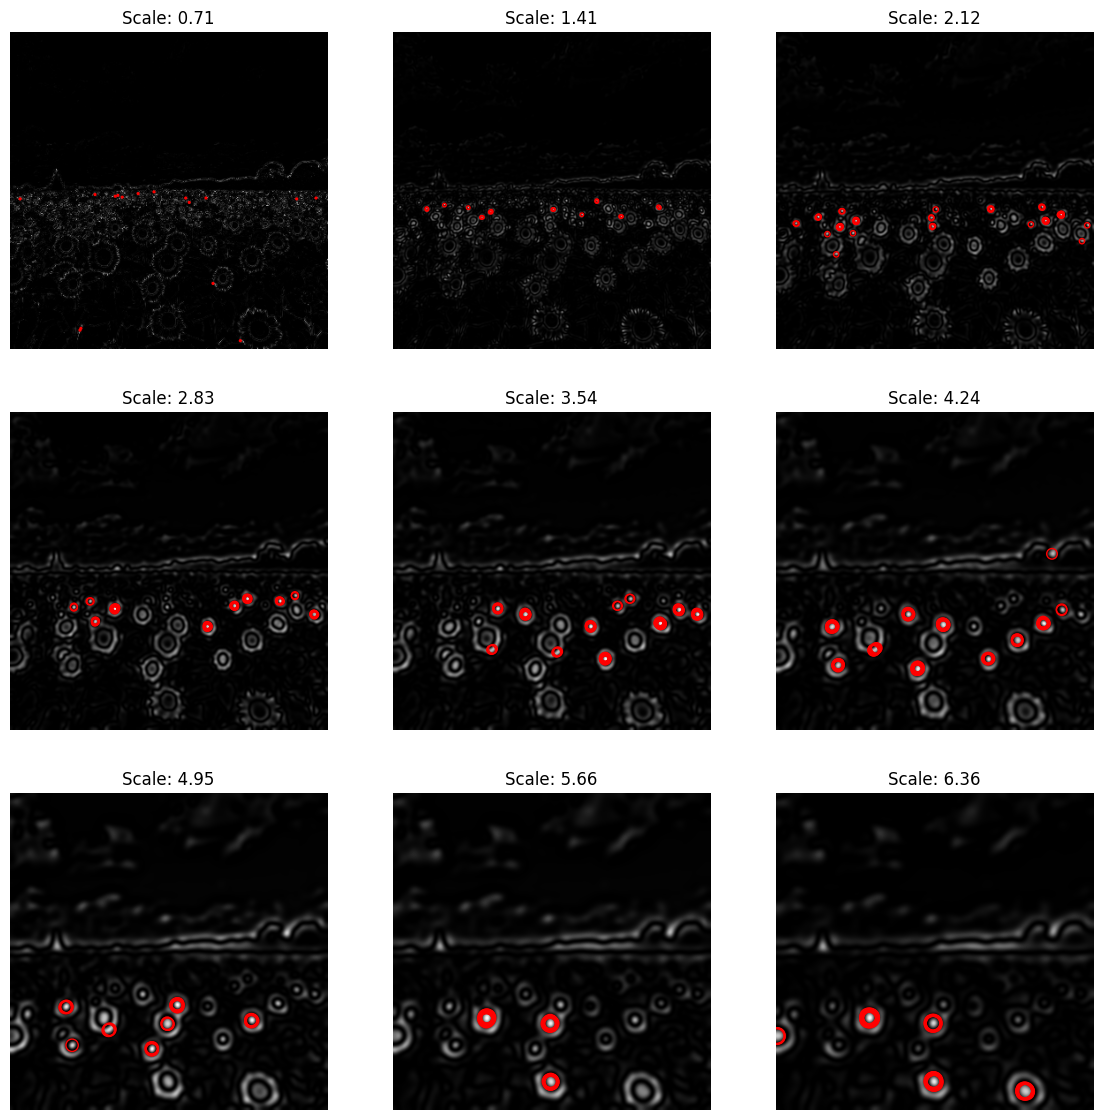

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

def generate_log_kernel(sigma):
    """Generate Laplacian of Gaussian (LoG) kernel."""
    radius = int(3 * sigma)
    x, y = np.meshgrid(np.arange(-radius, radius + 1), np.arange(-radius, radius + 1))
    kernel = ((x**2 + y**2) / (2 * sigma**2) - 1) * np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (np.pi * sigma**4)
    return kernel

def find_blob_centers(log_image, sigma):
    """Find local maxima in the LoG response image."""
    coords = []
    height, width = log_image.shape
    neighborhood = 1  # 3x3 window size
    for row in range(neighborhood, height-neighborhood):
        for col in range(neighborhood, width-neighborhood):
            local_window = log_image[row-neighborhood:row+neighborhood+1, col-neighborhood:col+neighborhood+1]
            max_response = np.max(local_window)
            if max_response >= 0.09:  # Adjust threshold for detection
                x_offset, y_offset = np.unravel_index(np.argmax(local_window), local_window.shape)
                coords.append((row + x_offset - neighborhood, col + y_offset - neighborhood))
    return set(coords)

# Load the image
img_path = 'utils/the_berry_farms_sunflower_field.jpeg'
image = cv.imread(img_path, cv.IMREAD_REDUCED_COLOR_4)
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) / 255.0

# Create a grid of subplots to visualize different scales
fig, axis_grid = plt.subplots(3, 3, figsize=(14, 14))

# Loop through multiple sigma values (scales)
for idx, ax in enumerate(axis_grid.flatten(), start=1):
    sigma = idx / 1.414  # Adjust sigma values for better detection
    log_kernel = sigma ** 2 * gaussian_laplacian_kernel(sigma)
    
    # Apply Laplacian of Gaussian filter to the grayscale image
    log_response = np.square(cv.filter2D(gray_image, -1, log_kernel))
    
    # Detect blob centers based on the LoG response
    blob_centers = find_blob_centers(log_response, sigma)

    # Display the LoG filtered image
    ax.imshow(log_response, cmap='gray')
    ax.set_title(f'Scale: {sigma:.2f}', fontsize=12)

    # Draw circles around detected blobs
    for x, y in blob_centers:
        circle = plt.Circle((y, x), sigma * 1.414, color='red', linewidth=1, fill=False)
        ax.add_patch(circle)

    ax.axis('off')

plt.show()


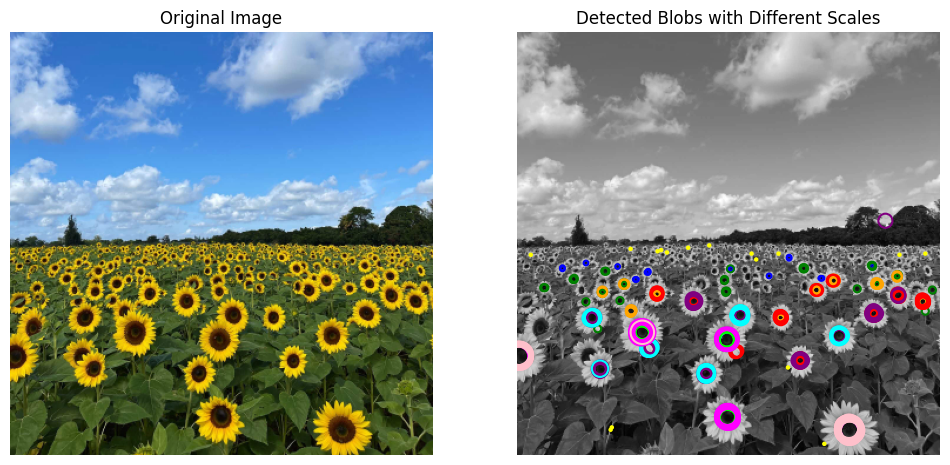

In [13]:

# Display the original image with detected blobs overlayed
fig, (ax_original, ax_overlay) = plt.subplots(1, 2, figsize=(12, 12))

# Show the original image
ax_original.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax_original.set_title("Original Image")
ax_original.axis('off')

# Show the grayscale image with detected blobs overlayed
ax_overlay.imshow(gray_image, cmap='gray')
ax_overlay.set_title("Detected Blobs with Different Scales")
ax_overlay.axis('off')

# List of colors for different blob scales
color_palette = ['yellow', 'blue', 'green', 'orange', 'red', 'purple', 'cyan', 'lime', 'magenta', 'pink']

# Loop through a range of sigma values and overlay the detected blobs on the grayscale image
for i in range(1, 11):
    sigma = i / 1.414
    log_kernel = sigma ** 2 * generate_log_kernel(sigma)
    
    # Apply LoG filter and find blobs
    log_response = np.square(cv.filter2D(gray_image, -1, log_kernel))
    blob_centers = find_blob_centers(log_response, sigma)

    # Draw blobs as circles with different colors based on the scale
    for x, y in blob_centers:
        circle = plt.Circle((y, x), sigma * 1.414, color=color_palette[i-1], linewidth=1.5, fill=False)
        ax_overlay.add_patch(circle)

# Show the final plot
plt.show()

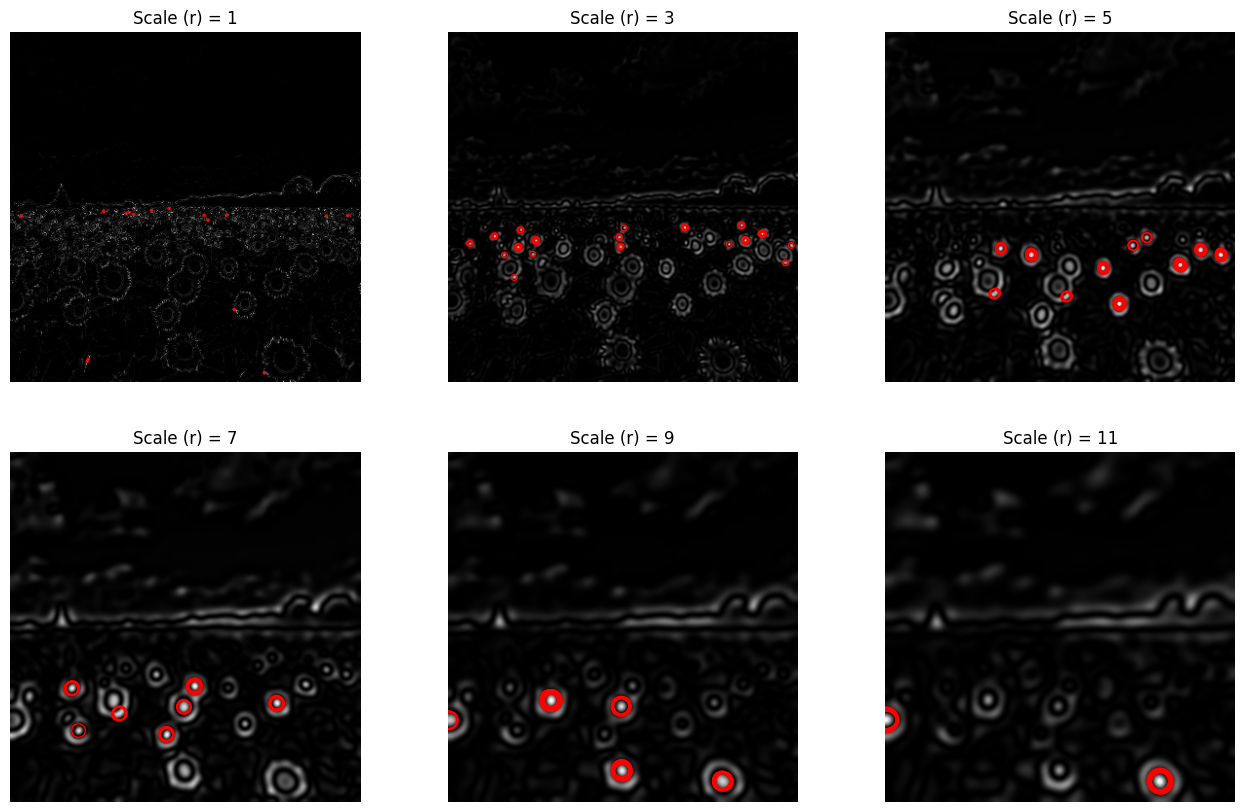

In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def generate_log_kernel(sigma):
    """Generate Laplacian of Gaussian (LoG) kernel."""
    radius = int(3 * sigma)
    x, y = np.meshgrid(np.arange(-radius, radius + 1), np.arange(-radius, radius + 1))
    kernel = ((x**2 + y**2) / (2 * sigma**2) - 1) * np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (np.pi * sigma**4)
    return kernel

def find_blob_centers(log_image, sigma):
    """Find local maxima in the LoG response image."""
    coords = []
    height, width = log_image.shape
    neighborhood = 1  # 3x3 window size
    for row in range(neighborhood, height-neighborhood):
        for col in range(neighborhood, width-neighborhood):
            local_window = log_image[row-neighborhood:row+neighborhood+1, col-neighborhood:col+neighborhood+1]
            max_response = np.max(local_window)
            if max_response >= 0.09:  # Adjust threshold for detection
                x_offset, y_offset = np.unravel_index(np.argmax(local_window), local_window.shape)
                coords.append((row + x_offset - neighborhood, col + y_offset - neighborhood))
    return set(coords)

# Load the image
img_path = 'utils/the_berry_farms_sunflower_field.jpeg'
image = cv.imread(img_path, cv.IMREAD_REDUCED_COLOR_4)
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) / 255.0

# Create a grid of subplots to visualize the results for sigma values r = 2, 4, 6, 8, 10, 12
fig, axis_grid = plt.subplots(2, 3, figsize=(16, 10))

# Loop through sigma values: r = 1, 3, 5, 7, 9, 11
for idx, (r, ax) in enumerate(zip(range(1, 12, 2), axis_grid.flatten())):
    sigma = r / 1.414  # Maintain the same sigma scaling
    log_kernel = sigma ** 2 * generate_log_kernel(sigma)
    
    # Apply Laplacian of Gaussian filter to the grayscale image
    log_response = np.square(cv.filter2D(gray_image, -1, log_kernel))
    
    # Detect blob centers based on the LoG response
    blob_centers = find_blob_centers(log_response, sigma)

    # Display the LoG filtered image
    ax.imshow(log_response, cmap='gray')
    ax.set_title(f'Scale (r) = {r}', fontsize=12)

    # Draw circles around detected blobs
    for x, y in blob_centers:
        circle = plt.Circle((y, x), sigma * 1.414, color='red', linewidth=1, fill=False)
        ax.add_patch(circle)

    ax.axis('off')

plt.show()

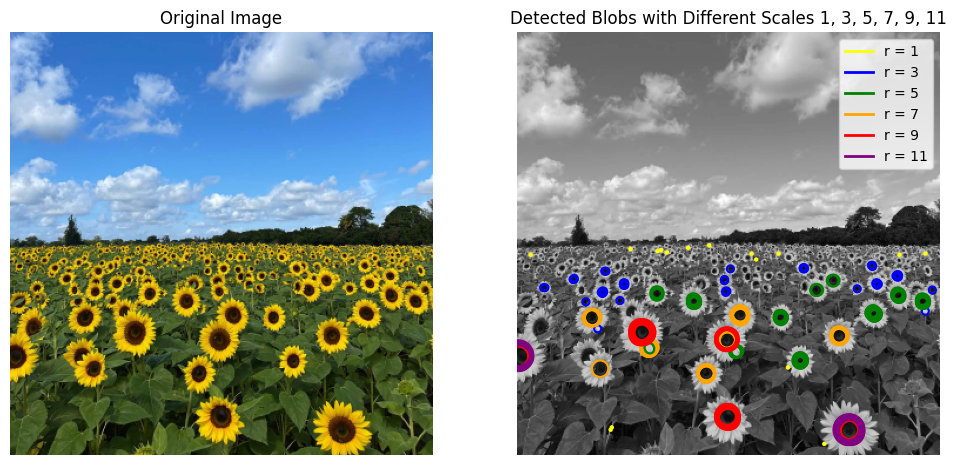

In [25]:
# Display the original image with detected blobs overlayed
fig, (ax_original, ax_overlay) = plt.subplots(1, 2, figsize=(12, 12))

# Show the original image
ax_original.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax_original.set_title("Original Image")
ax_original.axis('off')

# Show the grayscale image with detected blobs overlayed
ax_overlay.imshow(gray_image, cmap='gray')
ax_overlay.set_title("Detected Blobs with Different Scales 1, 3, 5, 7, 9, 11")
ax_overlay.axis('off')

# List of colors for different blob scales
color_palette = ['yellow', 'blue', 'green', 'orange', 'red', 'purple']
scale_labels = ['r = 1', 'r = 3', 'r = 5', 'r = 7', 'r = 9', 'r = 11']

# Patches and labels for the legend
patches = []

# Loop through the same sigma values: r = 1, 3, 5, 7, 9, 11
for i, r in enumerate(range(1, 12, 2)):
    sigma = r / 1.414
    log_kernel = sigma ** 2 * generate_log_kernel(sigma)
    
    # Apply LoG filter and find blobs
    log_response = np.square(cv.filter2D(gray_image, -1, log_kernel))
    blob_centers = find_blob_centers(log_response, sigma)

    # Draw blobs as circles with different colors based on the scale
    for x, y in blob_centers:
        circle = plt.Circle((y, x), sigma * 1.414, color=color_palette[i], linewidth=1.5, fill=False)
        ax_overlay.add_patch(circle)
    
    # Create a patch for the legend corresponding to this scale
    patches.append(plt.Line2D([0], [0], color=color_palette[i], lw=2))

# Add the legend
ax_overlay.legend(patches, scale_labels, loc='best', fontsize=10)

# Show the final plot
plt.show()